# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [3]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [6]:
# Get the number of unique countries
num_countries = df['country'].nunique()

print(f'The number of unique countries present in the dataset is: {num_countries}')

The number of unique countries present in the dataset is: 219


In [8]:
# Check the minimum and maximum year
min_year = df['year'].min()
max_year = df['year'].max()

print(f'The timespan of the data is from {min_year} to {max_year}.')

The timespan of the data is from 1980 to 2013.


In [14]:
# Get the unique years and countries
unique_years = df['year'].unique()
unique_countries = df['country'].unique()

# Create a DataFrame for all combinations of countries and years
all_combinations = pd.MultiIndex.from_product([unique_countries, unique_years], names=['country', 'year']).to_frame(index=False)

# Merge with the original DataFrame to find missing rows
merged_df = all_combinations.merge(df, on=['country', 'year'], how='left', indicator=True)

# Check for any missing entries
missing_data = merged_df[merged_df['_merge'] == 'left_only']

# Display the results
if missing_data.empty:
    print("Each country has a row for every year present.")
else:
    print("Some countries are missing data for certain years:")
    print(missing_data)



Some countries are missing data for certain years:
                                country  year  new_sp_m014  new_sp_m1524  \
850   Bonaire, Saint Eustatius and Saba  1980          NaN           NaN   
851   Bonaire, Saint Eustatius and Saba  1981          NaN           NaN   
852   Bonaire, Saint Eustatius and Saba  1982          NaN           NaN   
853   Bonaire, Saint Eustatius and Saba  1983          NaN           NaN   
854   Bonaire, Saint Eustatius and Saba  1984          NaN           NaN   
...                                 ...   ...          ...           ...   
6545                        Timor-Leste  1997          NaN           NaN   
6546                        Timor-Leste  1998          NaN           NaN   
6547                        Timor-Leste  1999          NaN           NaN   
6548                        Timor-Leste  2000          NaN           NaN   
6549                        Timor-Leste  2001          NaN           NaN   

      new_sp_m2534  new_sp_m3544  ne

In [15]:
# Group by Country to see which countries are missing years
missing_data_grouped = missing_data.groupby('country').agg({'year': 'count'}).reset_index()

# Display results
if missing_data_grouped.empty:
    print("Each country has a row for every year present.")
else:
    print("Countries missing years and the count of missing years:")
    print(missing_data_grouped)

Countries missing years and the count of missing years:
                             country  year
0  Bonaire, Saint Eustatius and Saba    30
1                            Curacao    30
2                         Montenegro    25
3               Netherlands Antilles     4
4                             Serbia    25
5                Serbia & Montenegro     9
6          Sint Maarten (Dutch part)    30
7                        South Sudan    31
8                        Timor-Leste    22


In [16]:
# Check the shape of the DataFrame to understand its structure
print("Shape of the DataFrame:", df.shape)

# Considering columns 3 to 57 in 0-indexed format, they are 2 to 56
# We want to count rows with at least one non-null in these columns
rows_with_non_nulls = df.iloc[:, 2:57].notnull().any(axis=1)

# Count the number of rows with at least one non-null value
count_non_null_rows = rows_with_non_nulls.sum()

# Display the result
print("Number of rows with at least one non-null value across columns 3 to 57:", count_non_null_rows)

Shape of the DataFrame: (7240, 58)
Number of rows with at least one non-null value across columns 3 to 57: 3483


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be:

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [24]:
# Define the mapping for diagnosis methods
diagnosis_mapping = {
    'newsp': 'Pulmonary Smear (+)',
    'newsn': 'Pulmonary Smear (-)',
    'newep': 'Extrapulmonary',
    'newrel': 'Relapse'
}

# Prepare to melt the DataFrame
# Assuming diagnosis methods are in columns starting from the 3rd column up to the 57th
diagnosis_columns = df.columns[2:56]  # Adjust based on actual column structure

# Melt the DataFrame to long format
melted_df = pd.melt(df, id_vars=['country', 'year'], value_vars=diagnosis_columns,
                    var_name='diagnosis_method', value_name='number_of_cases')

# Filter out the rows with zero cases
melted_df = melted_df[melted_df['number_of_cases'] != 0]

# Map the diagnosis methods
melted_df['diagnosis_method'] = melted_df['diagnosis_method'].map(diagnosis_mapping)

# Assume we have a way to get gender and age
# Let's say we have a column in our DataFrame for gender coded as 'm' and 'f'
# Replace this placeholder with actual data logic
df['gender'] = ['m'] * len(df)  # This is an example placeholder. Replace with actual values.
# Map to 'male' and 'female'
df['gender'] = df['gender'].replace({'m': 'male', 'f': 'female'})

# Example age definition
# Placeholder for age. Adjust according to your actual dataset.
df['age'] = '0-14'  # Replace with actual logic to fill this column.

# Combine the melted DataFrame with gender and age range
melted_df = melted_df.merge(df[['country', 'year', 'gender', 'age']], on=['country', 'year'])

# Selecting and renaming columns to match the final output
final_df = melted_df[['country', 'year', 'diagnosis_method', 'gender', 'age', 'number_of_cases']]

# Renaming the columns to the required output format
final_df.columns = ['country', 'year', 'diagnosis method', 'gender', 'age', 'number of cases']

# Display the final DataFrame
print(final_df.head())  # Display the first few rows of the final DataFrame

       country  year diagnosis method gender   age number of cases
0  Afghanistan  1980              NaN   male  0-14             AFG
1  Afghanistan  1980              NaN   male  0-14             NaN
2  Afghanistan  1980              NaN   male  0-14             NaN
3  Afghanistan  1980              NaN   male  0-14             NaN
4  Afghanistan  1980              NaN   male  0-14             NaN


## Question 3: Create a graph that shows when countries started to report TB cases.

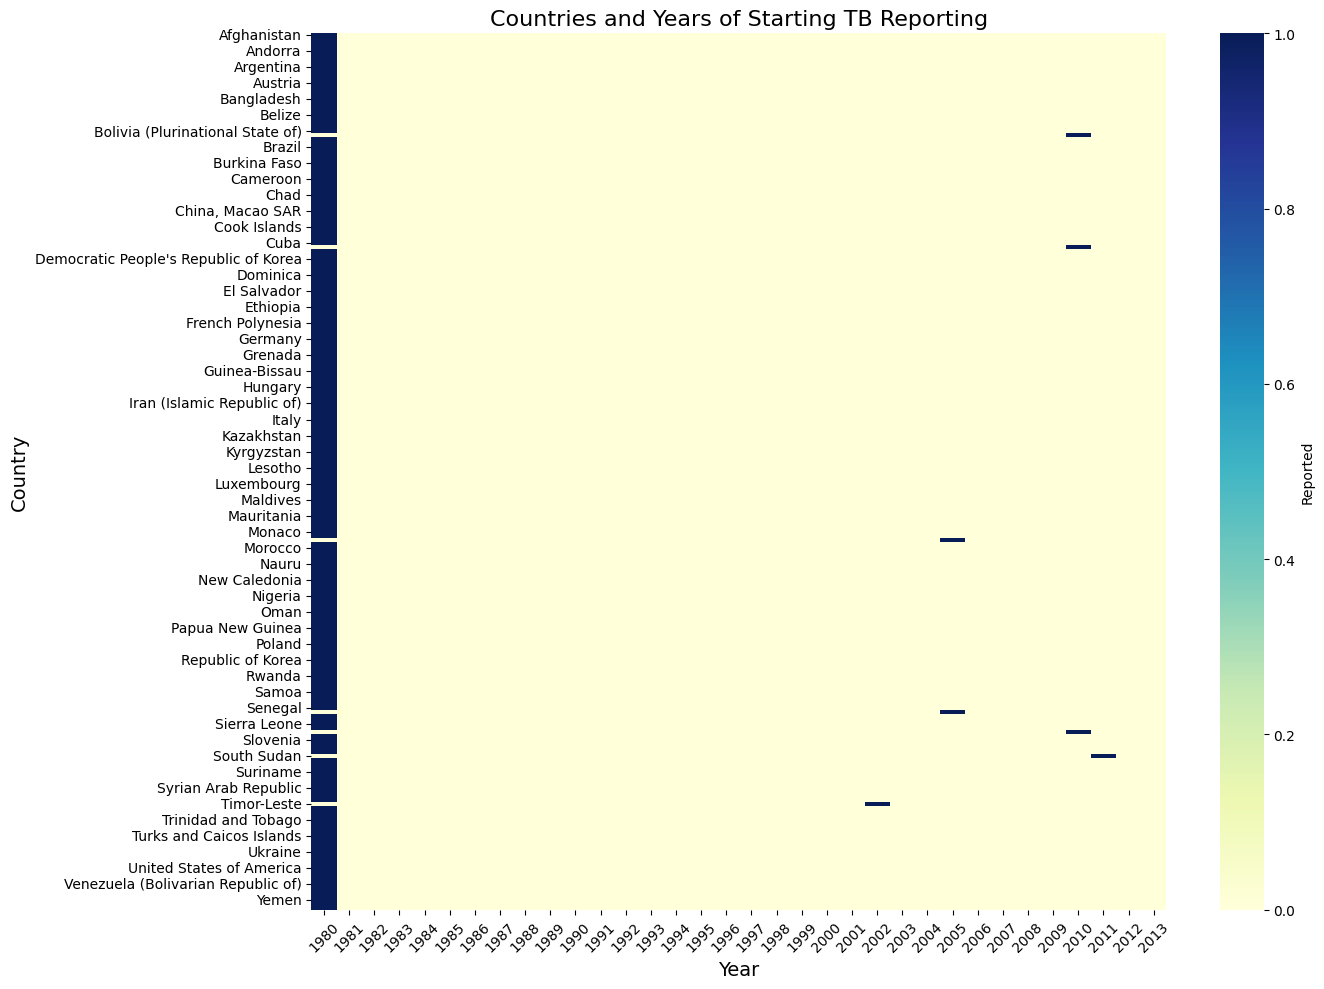

In [27]:
# Get the earliest year for each country
earliest_reporting = melted_df.groupby('country')['year'].min().reset_index()

# Create a DataFrame for the heatmap
countries = earliest_reporting['country'].unique()
years = sorted(melted_df['year'].unique())
heatmap_data = pd.DataFrame(index=countries, columns=years, data=0)

# Populate the heatmap data
for _, row in earliest_reporting.iterrows():
    heatmap_data.loc[row['country'], row['year']] = 1

# Convert the DataFrame to integer type
heatmap_data = heatmap_data.fillna(0).astype(int)

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Reported'}, annot=False)

# Formatting the plot
plt.title('Countries and Years of Starting TB Reporting', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()